In [1]:
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Grouper
from pandas import DataFrame
import csv
import pickle
import math
import matrixprofile as mp
from matplotlib.patches import Rectangle
from fbprophet import Prophet
from prophet.plot import plot_yearly
from sklearn.metrics import mean_squared_error
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from sklearn.model_selection import TimeSeriesSplit
from numpy import sqrt
import datetime
from datetime import timedelta

/home/jonathan/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def df_origen(origen,destino):    
    
    ######################PICKLE 1###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento1.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df1 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df1.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    
    df1_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)   
    
    ######################PICKLE 2###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento2.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df2 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df2.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)           
    
    df2_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)   
    
    ######################PICKLE 3###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento3.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df3 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df3.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    
    df3_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)
    
    
    
    df1_Final['Fecha'] = df1_Final.index.date
    df1_Final['Año'] = df1_Final.index.year                                
    df1_Final['Mes'] = df1_Final.index.month                               
    df1_Final['ID_Dia'] = df1_Final.index.dayofweek
    df1_Final['Hora'] = df1_Final.index.hour
    df1_Final['WeekNo'] = df1_Final.index.isocalendar().week
    
    df2_Final['Fecha'] = df2_Final.index.date
    df2_Final['Año'] = df2_Final.index.year                                
    df2_Final['Mes'] = df2_Final.index.month                               
    df2_Final['ID_Dia'] = df2_Final.index.dayofweek
    df2_Final['Hora'] = df2_Final.index.hour
    df2_Final['WeekNo'] = df2_Final.index.isocalendar().week
    
    df3_Final['Fecha'] = df3_Final.index.date
    df3_Final['Año'] = df3_Final.index.year                                
    df3_Final['Mes'] = df3_Final.index.month                               
    df3_Final['ID_Dia'] = df3_Final.index.dayofweek
    df3_Final['Hora'] = df3_Final.index.hour
    df3_Final['WeekNo'] = df3_Final.index.isocalendar().week
    
    return df1, lista, df2, df3, df1_Final,df2_Final,df3_Final, listaDst

In [3]:
origen = "2807905"
destino = "2807901"
df1, lista, df2, df3, df1_Final,df2_Final,df3_Final, listaDst = df_origen(origen,destino)
df1_Final.head(5)
df2_Final.head(5)
df3_Final.head(5)

,2807905-2807901,Fecha,Año,Mes,ID_Dia,Hora,WeekNo
ds,,,,,,,
2020-08-01 00:00:00,342.675,2020-08-01,2020,8,5,0,31
2020-08-01 01:00:00,161.815,2020-08-01,2020,8,5,1,31
2020-08-01 02:00:00,69.203,2020-08-01,2020,8,5,2,31
2020-08-01 03:00:00,44.679,2020-08-01,2020,8,5,3,31
2020-08-01 04:00:00,27.632,2020-08-01,2020,8,5,4,31


In [4]:
#Creamos intervalos de datos por periodos
data1=df1_Final.loc['2020-03-16':'2020-04-15']
data2=df1_Final.loc['2020-04-16':'2020-05-15']
data3=df1_Final.loc['2020-05-01':'2020-05-31']
data4=df2_Final.loc['2020-06-01':'2020-06-30']
data5=df2_Final.loc['2020-07-01':'2020-07-31']
data6=df3_Final.loc['2020-08-01':'2020-08-31']
data6.tail(5)

,2807905-2807901,Fecha,Año,Mes,ID_Dia,Hora,WeekNo
ds,,,,,,,
2020-08-31 19:00:00,509.100,2020-08-31,2020,8,0,19,36
2020-08-31 20:00:00,293.615,2020-08-31,2020,8,0,20,36
2020-08-31 21:00:00,256.641,2020-08-31,2020,8,0,21,36
2020-08-31 22:00:00,172.866,2020-08-31,2020,8,0,22,36
2020-08-31 23:00:00,140.111,2020-08-31,2020,8,0,23,36


In [5]:
##### Creamos tablas con cada uno de los principales trayectos
lista_periodos=[1,2,3,4,5,6]    
dict_dias={0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}
        
for periodo in lista_periodos:        
    cont=0
    globals()[f"d{periodo}"] = globals()[f"data{periodo}"].reset_index()                                
    globals()[f"df_{periodo}"] = pd.DataFrame(data=globals()[f"d{periodo}"], columns=['ds',listaDst[1],'Hora','Fecha','WeekNo','ID_Dia'])
    globals()[f"df_{periodo}"].set_index([listaDst[1]], inplace = True) 
    
    for dia in dict_dias:        
        globals()[f"df_{dict_dias[dia]}_{periodo}"] = globals()[f"df_{periodo}"].loc[globals()[f"df_{periodo}"].loc[:,'ID_Dia'] == cont]  # Seleccionamos solo los datos del lunes o solo los datos del martes para crear nuevas tablas dependiendo del día        
        globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"] = pd.DataFrame({})  #Creamos un nuevo dataframe vacio
        globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"] = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].append(globals()[f"df_{dict_dias[dia]}_{periodo}"])  #Guardamos en el dataframe vacio cada una de las tablas, hay tabla lunes, tabla martes..
        
        #Seleccionamos celdas del dataframe para generar las fechas que se requieren graficar
        start = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].iloc[0]['Fecha'] #Primera celda de la columna fecha
        period_start = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].iloc[0]['WeekNo']
        period_end = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].at[globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].index[-1],'WeekNo']  #última celda de columna WeekNo
        
        #Condición de error en period_start/period_end
        if (type(period_start) == pd.core.series.Series) | (type(period_end) == pd.core.series.Series):    
            lista = list(period_end)
            period_end = lista[-1]        
        
        periods = list(range(period_start, period_end+1))

        #Obtenemos las fechas de cada día 
        date_generated = pd.date_range(start, periods=len(periods), freq='7D')
        
        #Creamos una tabla para cada fecha de cada lunes o de cada martes..
        cont2=1        
        for date in date_generated:            
            globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}_{cont2}"] = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].loc[globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].loc[:,'Fecha'] == date]
            cont2=cont2+1
        cont=cont+1
    

/tmp/ipykernel_7223/4220055855.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"] = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].append(globals()[f"df_{dict_dias[dia]}_{periodo}"])  #Guardamos en el dataframe vacio cada una de las tablas, hay tabla lunes, tabla martes..
/home/jonathan/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
/tmp/ipykernel_7223/4220055855.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  globals()[f"filtra

/tmp/ipykernel_7223/4220055855.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"] = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].append(globals()[f"df_{dict_dias[dia]}_{periodo}"])  #Guardamos en el dataframe vacio cada una de las tablas, hay tabla lunes, tabla martes..
/home/jonathan/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
/tmp/ipykernel_7223/4220055855.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  globals()[f"filtra

In [6]:
period1 = filtrado_Data_Monday_3
period2 = filtrado_Data_Monday_4
period3 = filtrado_Data_Monday_5
period4 = filtrado_Data_Monday_6
Lunes = pd.concat([period1,period2,period3,period4])
start_date = pd.Timestamp('2020-05-02')
end_date = pd.Timestamp('2020-08-31')
mask = (Lunes['Fecha'] >= start_date) & (Lunes['Fecha'] <= end_date)
Lunes = Lunes.loc[mask]
Lunes = Lunes.reset_index()
Lunes = Lunes.set_index(["ds"])
#desescalada.tail(50)

/home/jonathan/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


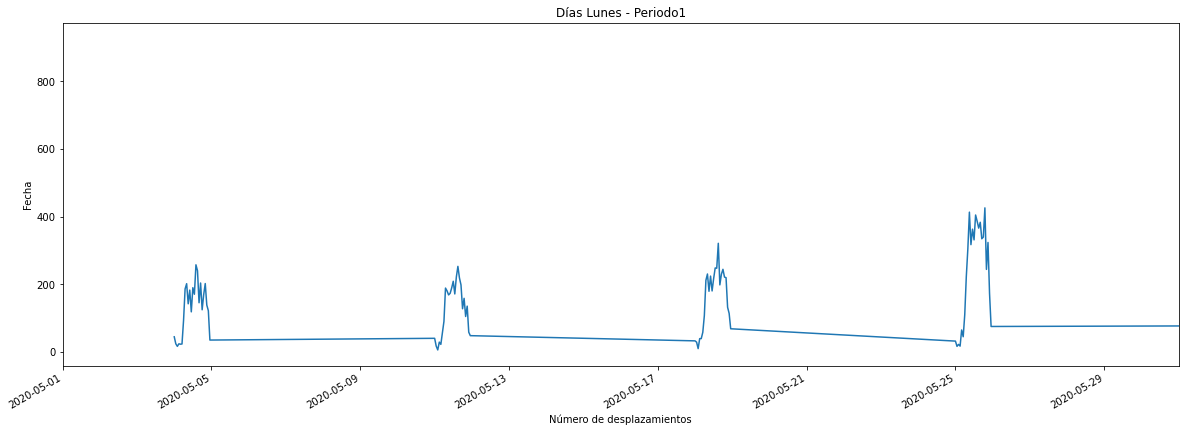

In [7]:
Lunes[Lunes.columns[0]].plot(figsize=(20,7), legend=None, title='Días Lunes - Periodo1')
plt.xlim([pd.to_datetime('2020-05-01'), pd.to_datetime('2020-05-31')])
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()


# Patrón Día Lunes 8 Am

In [8]:
filtrar_Hora1 = Lunes.loc[Lunes.loc[:,'Hora'] == 1]
filtrar_Hora2 = Lunes.loc[Lunes.loc[:,'Hora'] == 2]
filtrar_Hora3 = Lunes.loc[Lunes.loc[:,'Hora'] == 7]
filtrar_Hora4 = Lunes.loc[Lunes.loc[:,'Hora'] == 8]
filtrar_Hora5 = Lunes.loc[Lunes.loc[:,'Hora'] == 12]
filtrar_Hora6 = Lunes.loc[Lunes.loc[:,'Hora'] == 13]
filtrar_Hora7 = Lunes.loc[Lunes.loc[:,'Hora'] == 14]
filtrar_Hora8 = Lunes.loc[Lunes.loc[:,'Hora'] == 17]
filtrar_Hora9 = Lunes.loc[Lunes.loc[:,'Hora'] == 18]
filtrar_Hora10 = Lunes.loc[Lunes.loc[:,'Hora'] == 19]
filtrar_Hora11 = Lunes.loc[Lunes.loc[:,'Hora'] == 22]
filtrar_Hora12 = Lunes.loc[Lunes.loc[:,'Hora'] == 23]
filtrar_Hora13 = Lunes.loc[Lunes.loc[:,'Hora'] == 0]


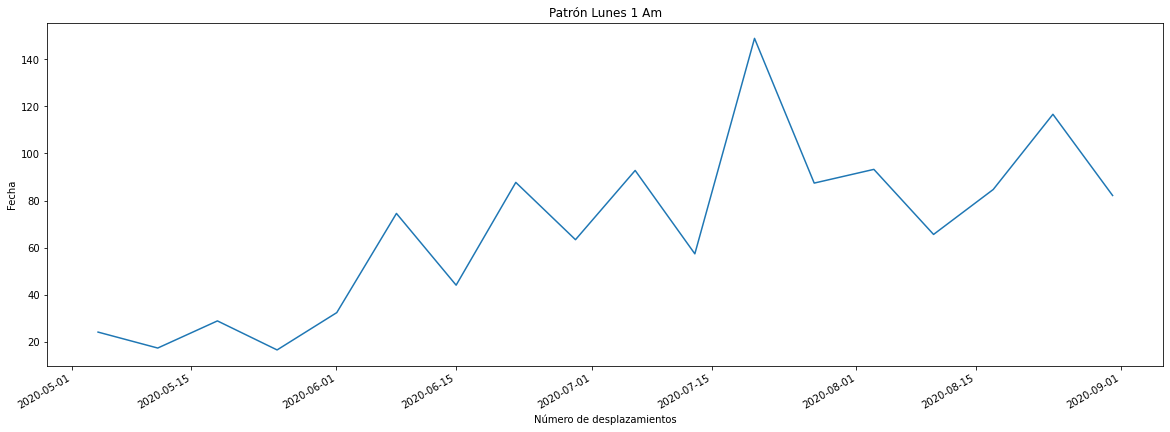

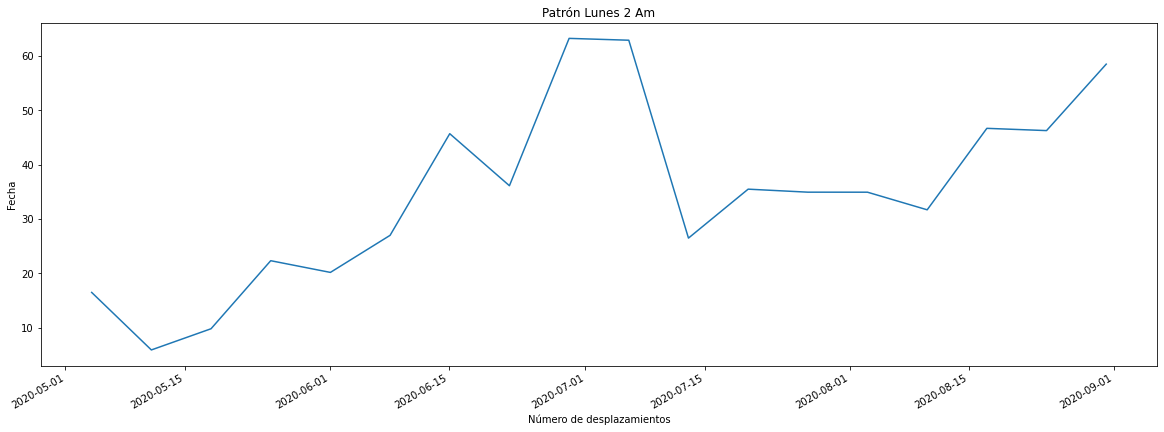

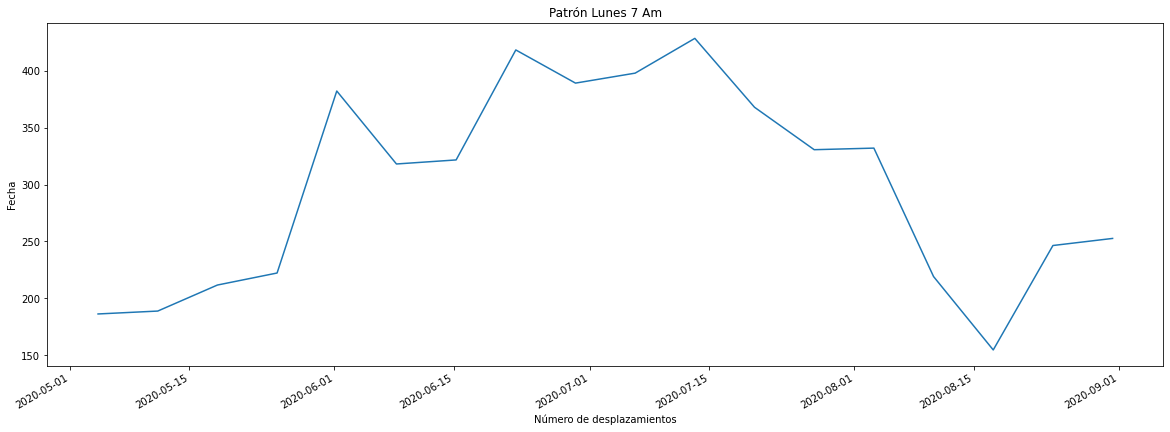

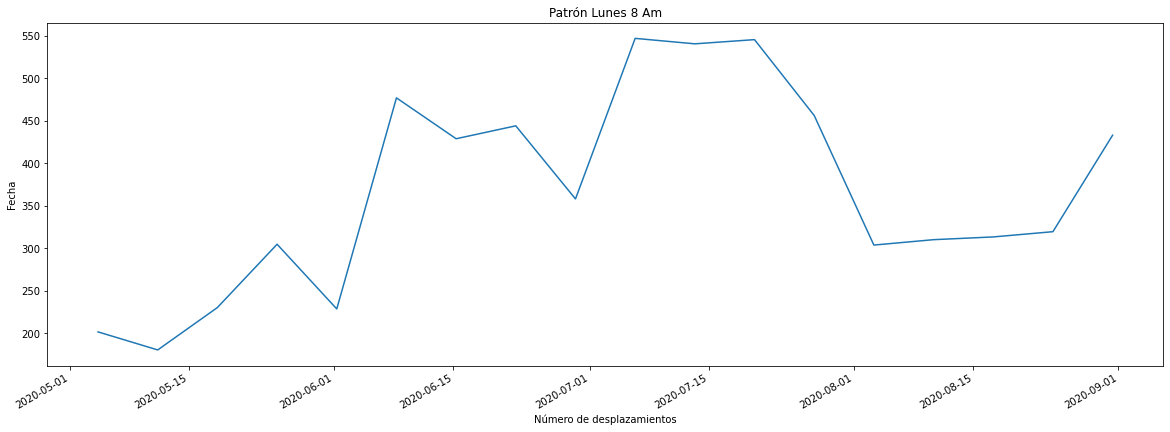

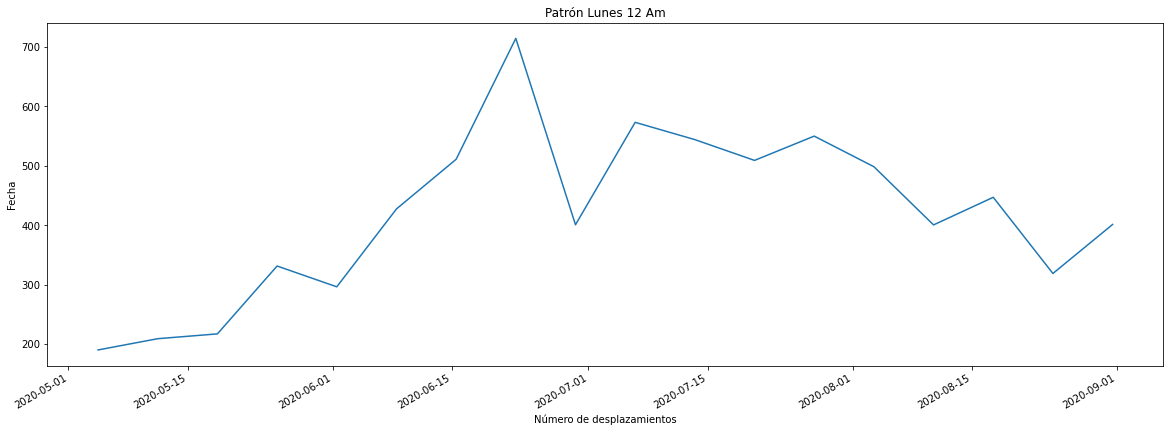

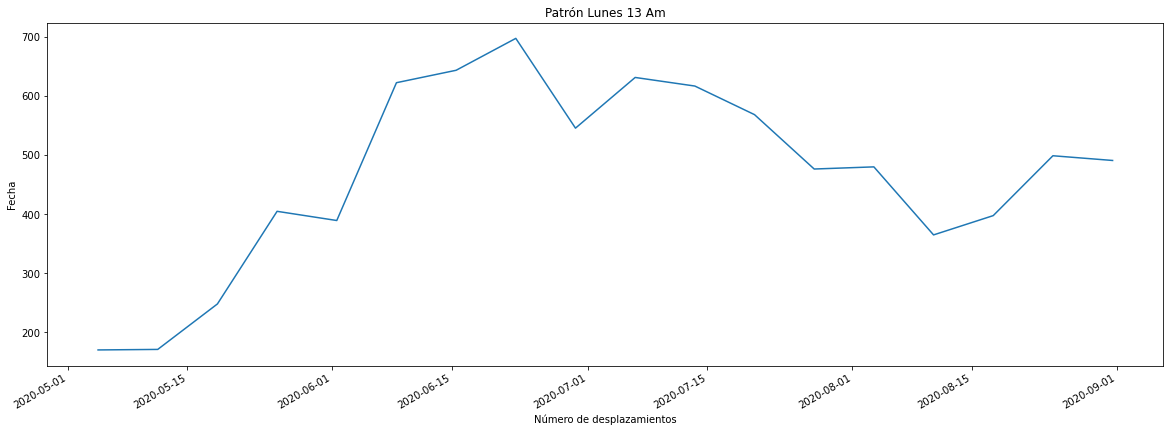

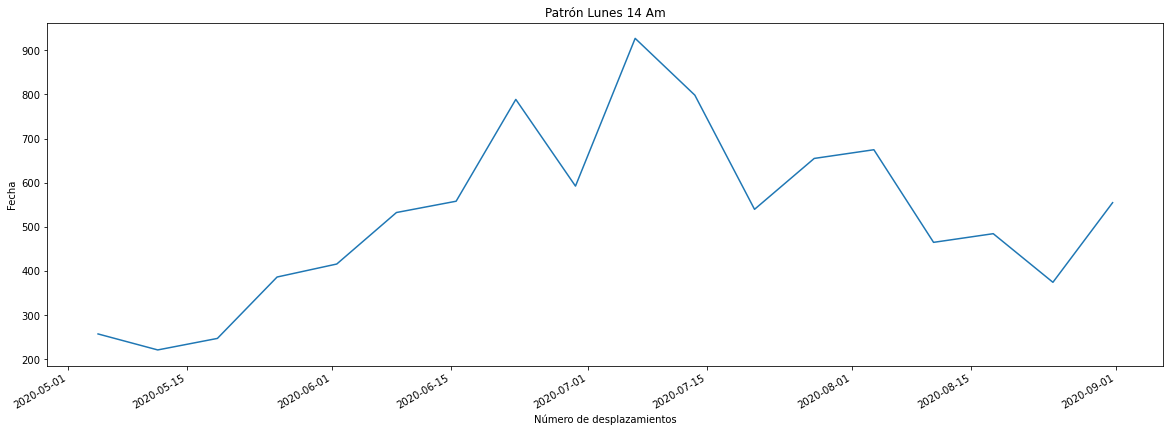

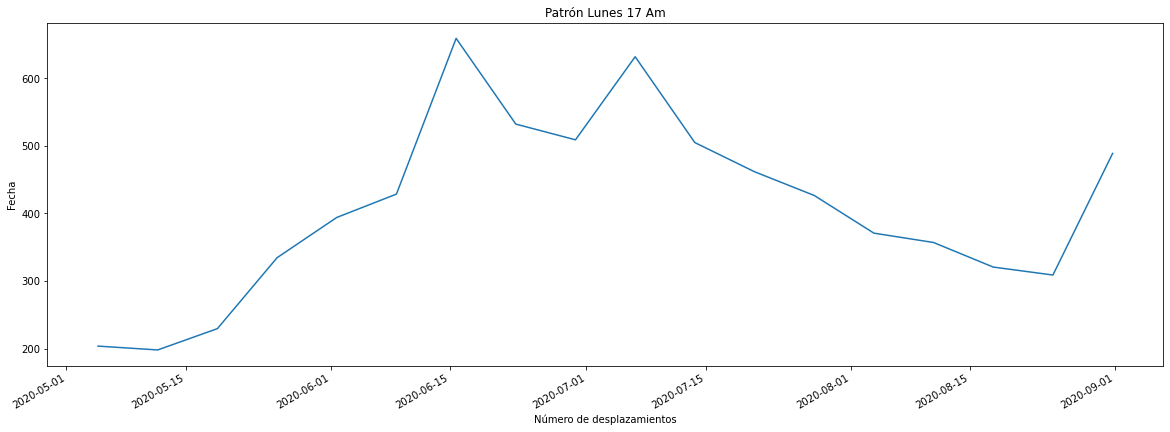

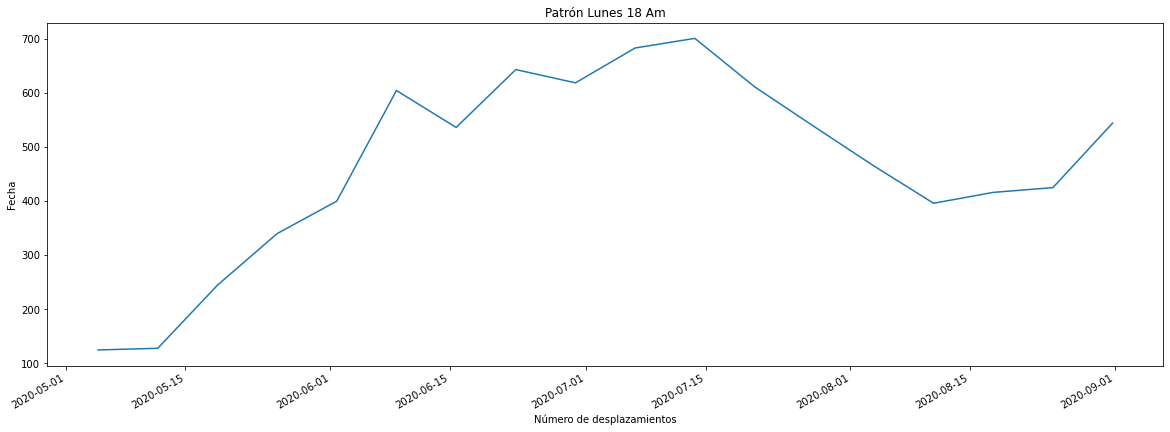

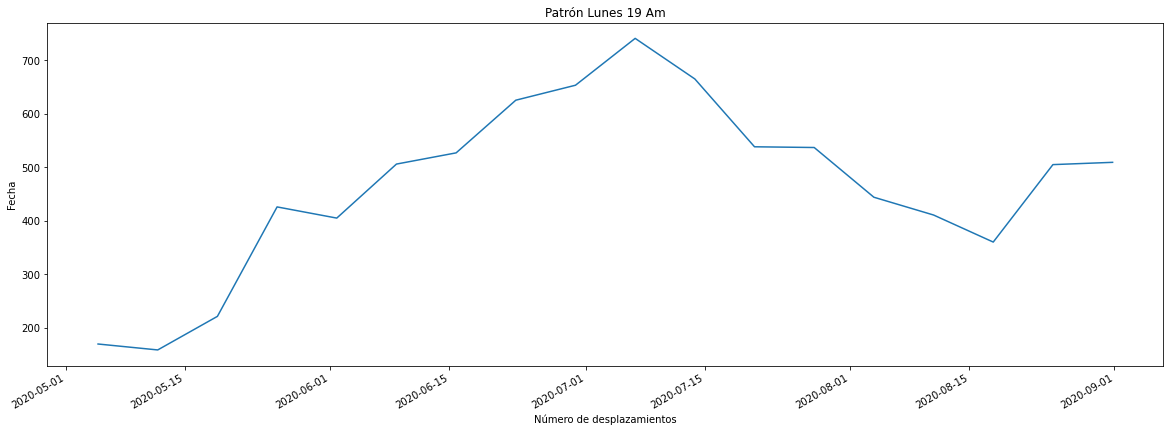

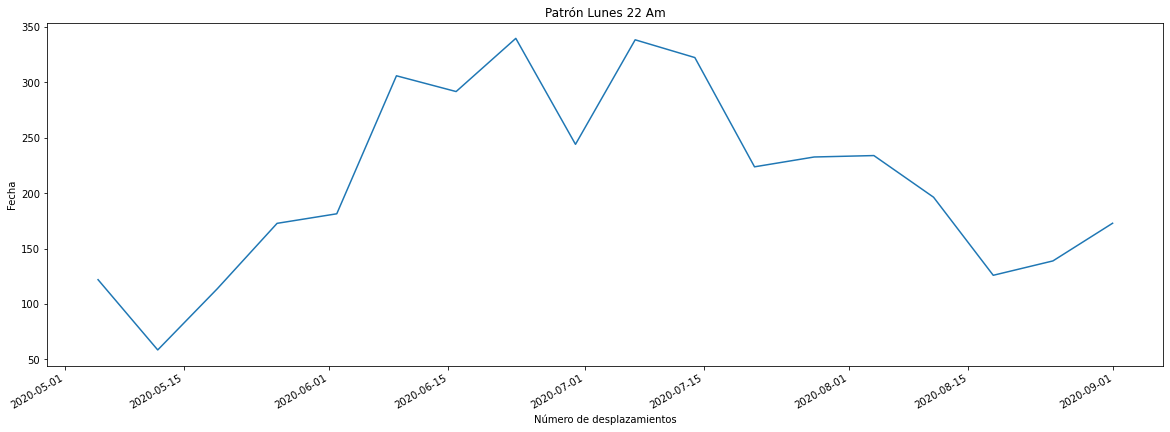

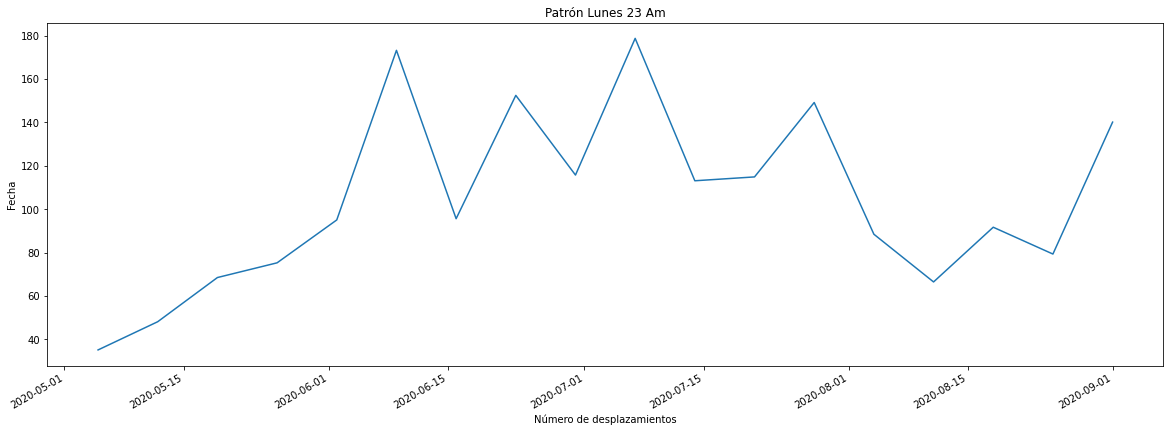

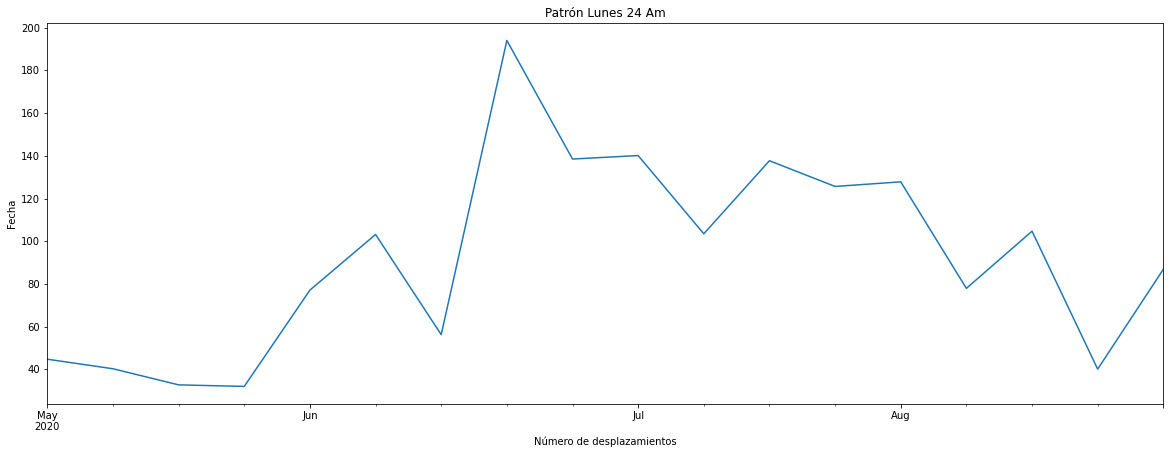

In [9]:
filtrar_Hora1[filtrar_Hora1.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 1 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()
filtrar_Hora2[filtrar_Hora2.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 2 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()
filtrar_Hora3[filtrar_Hora3.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 7 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()
filtrar_Hora4[filtrar_Hora4.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 8 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()
filtrar_Hora5[filtrar_Hora5.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 12 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()
filtrar_Hora6[filtrar_Hora6.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 13 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()
filtrar_Hora7[filtrar_Hora7.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 14 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()
filtrar_Hora8[filtrar_Hora8.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 17 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()
filtrar_Hora9[filtrar_Hora9.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 18 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()
filtrar_Hora10[filtrar_Hora10.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 19 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()
filtrar_Hora11[filtrar_Hora11.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 22 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()
filtrar_Hora12[filtrar_Hora12.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 23 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()
filtrar_Hora13[filtrar_Hora13.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 24 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()

# Preparamos los datos 
## Periodo 1 - Lunes: Desescalada y Nueva Normalidad (2 mayo 2020-31 Agosto 2020)

In [10]:
Lunes = Lunes.drop(columns=['Fecha','ID_Dia','Hora','WeekNo'])
Lunes = Lunes.reset_index()
Lunes = Lunes.rename(columns={'2807905-2807901':'y'})
Lunes.tail(50)

,ds,y
382,2020-08-17 22:00:00,125.886
383,2020-08-17 23:00:00,91.684
384,2020-08-24 00:00:00,40.139
385,2020-08-24 01:00:00,116.619
386,2020-08-24 02:00:00,46.237
387,2020-08-24 03:00:00,6.741
388,2020-08-24 04:00:00,32.455
389,2020-08-24 05:00:00,35.540
390,2020-08-24 06:00:00,132.610
391,2020-08-24 07:00:00,246.431


# Establecemos una estacionalidad condicional

In [11]:
def est_Lunes1AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 1)

def est_Lunes2AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 2)

def est_Lunes3AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 3)

def est_Lunes4AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 4)

def est_Lunes5AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 5)

def est_Lunes6AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 6)

def est_Lunes7AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 7)

def est_Lunes8AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 8)

def est_Lunes9AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 9)

def est_Lunes10AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 10)

def est_Lunes11AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 11)

def est_Lunes12PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 12)

def est_Lunes13PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 13)

def est_Lunes14PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 14)

def est_Lunes15PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 15)

def est_Lunes16PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 16)

def est_Lunes17PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 17)

def est_Lunes18PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 18)

def est_Lunes19PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 19)

def est_Lunes20PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 20)

def est_Lunes21PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 21)

def est_Lunes22PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 22)

def est_Lunes23PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 23)

def est_Lunes24AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 0)

Lunes['Lunes1AM'] = Lunes['ds'].apply(est_Lunes1AM)
#Test['Lunes1AM'] = Test['ds'].apply(est_Lunes1AM)

Lunes['Lunes2AM'] = Lunes['ds'].apply(est_Lunes2AM)
#Test['Lunes2AM'] = Test['ds'].apply(est_Lunes2AM)

Lunes['Lunes3AM'] = Lunes['ds'].apply(est_Lunes3AM)
#Test['Lunes3AM'] = Test['ds'].apply(est_Lunes3AM)

Lunes['Lunes4AM'] = Lunes['ds'].apply(est_Lunes4AM)
#Test['Lunes4AM'] = Test['ds'].apply(est_Lunes4AM)

Lunes['Lunes5AM'] = Lunes['ds'].apply(est_Lunes5AM)
#Test['Lunes5AM'] = Test['ds'].apply(est_Lunes5AM)

Lunes['Lunes6AM'] = Lunes['ds'].apply(est_Lunes6AM)
#Test['Lunes6AM'] = Test['ds'].apply(est_Lunes6AM)

Lunes['Lunes7AM'] = Lunes['ds'].apply(est_Lunes7AM)
#Test['Lunes7AM'] = Test['ds'].apply(est_Lunes7AM)

Lunes['Lunes8AM'] = Lunes['ds'].apply(est_Lunes8AM)
#Test['Lunes8AM'] = Test['ds'].apply(est_Lunes8AM)

Lunes['Lunes9AM'] = Lunes['ds'].apply(est_Lunes9AM)
#Test['Lunes9AM'] = Test['ds'].apply(est_Lunes9AM)

Lunes['Lunes10AM'] = Lunes['ds'].apply(est_Lunes10AM)
#Test['Lunes10AM'] = Test['ds'].apply(est_Lunes10AM)

Lunes['Lunes11AM'] = Lunes['ds'].apply(est_Lunes11AM)
#Test['Lunes11AM'] = Test['ds'].apply(est_Lunes11AM)

Lunes['Lunes12PM'] = Lunes['ds'].apply(est_Lunes12PM)
#Test['Lunes12PM'] = Test['ds'].apply(est_Lunes12PM)

Lunes['Lunes13PM'] = Lunes['ds'].apply(est_Lunes13PM)
#Test['Lunes13PM'] = Test['ds'].apply(est_Lunes13PM)

Lunes['Lunes14PM'] = Lunes['ds'].apply(est_Lunes14PM)
#Test['Lunes14PM'] = Test['ds'].apply(est_Lunes14PM)

Lunes['Lunes15PM'] = Lunes['ds'].apply(est_Lunes15PM)
#Test['Lunes15PM'] = Test['ds'].apply(est_Lunes15PM)

Lunes['Lunes16PM'] = Lunes['ds'].apply(est_Lunes16PM)
#Test['Lunes16PM'] = Test['ds'].apply(est_Lunes16PM)

Lunes['Lunes17PM'] = Lunes['ds'].apply(est_Lunes17PM)
#Test['Lunes17PM'] = Test['ds'].apply(est_Lunes17PM)

Lunes['Lunes18PM'] = Lunes['ds'].apply(est_Lunes18PM)
#Test['Lunes18PM'] = Test['ds'].apply(est_Lunes18PM)

Lunes['Lunes19PM'] = Lunes['ds'].apply(est_Lunes19PM)
#Test['Lunes19PM'] = Test['ds'].apply(est_Lunes19PM)

Lunes['Lunes20PM'] = Lunes['ds'].apply(est_Lunes20PM)
#Test['Lunes20PM'] = Test['ds'].apply(est_Lunes20PM)

Lunes['Lunes21PM'] = Lunes['ds'].apply(est_Lunes21PM)
#Test['Lunes21PM'] = Test['ds'].apply(est_Lunes21PM)

Lunes['Lunes22PM'] = Lunes['ds'].apply(est_Lunes22PM)
#Test['Lunes22PM'] = Test['ds'].apply(est_Lunes22PM)

Lunes['Lunes23PM'] = Lunes['ds'].apply(est_Lunes23PM)
#Test['Lunes23PM'] = Test['ds'].apply(est_Lunes23PM)

Lunes['Lunes24AM'] = Lunes['ds'].apply(est_Lunes24AM)
#Test['Lunes24AM'] = Test['ds'].apply(est_Lunes24AM)



# Implementación de Modelo Prophet
## Aplicamos Cross Validation mediante libreria Sklearn (timeseriesSplit)

In [12]:
tscv = TimeSeriesSplit(n_splits = 4)
rmse = []

def crossvalidation():
    cont = 1 
    for train_index, test_index in tscv.split(Lunes):
        cv_train, cv_test = Lunes.iloc[train_index], Lunes.iloc[test_index]#cv_train contiene todas las columnas incloyundo el index numerico
        m = Prophet(weekly_seasonality=False,daily_seasonality=True)#,growth='flat')       
        m.add_seasonality(name='Lunes24AM_season', period=122, fourier_order=7, condition_name='Lunes24AM')
        m.add_seasonality(name='Lunes1AM_season', period=122, fourier_order=7, condition_name='Lunes1AM')
        m.add_seasonality(name='Lunes2AM_season', period=122, fourier_order=7, condition_name='Lunes2AM')
        m.add_seasonality(name='Lunes3AM_season', period=122, fourier_order=7, condition_name='Lunes3AM')
        m.add_seasonality(name='Lunes4AM_season', period=122, fourier_order=7, condition_name='Lunes4AM')
        m.add_seasonality(name='Lunes5AM_season', period=122, fourier_order=7, condition_name='Lunes5AM')
        m.add_seasonality(name='Lunes6AM_season', period=122, fourier_order=7, condition_name='Lunes6AM')
        m.add_seasonality(name='Lunes7AM_season', period=122, fourier_order=7, condition_name='Lunes7AM')
        m.add_seasonality(name='Lunes8AM_season', period=122, fourier_order=7, condition_name='Lunes8AM')
        m.add_seasonality(name='Lunes9AM_season', period=122, fourier_order=7, condition_name='Lunes9AM')
        m.add_seasonality(name='Lunes10AM_season', period=122, fourier_order=7, condition_name='Lunes10AM')
        m.add_seasonality(name='Lunes11AM_season', period=122, fourier_order=7, condition_name='Lunes11AM')
        m.add_seasonality(name='Lunes12PM_season', period=122, fourier_order=7, condition_name='Lunes12PM')
        m.add_seasonality(name='Lunes13PM_season', period=122, fourier_order=7, condition_name='Lunes13PM')
        m.add_seasonality(name='Lunes14PM_season', period=122, fourier_order=7, condition_name='Lunes14PM')        
        m.add_seasonality(name='Lunes15PM_season', period=122, fourier_order=7, condition_name='Lunes15PM')        
        m.add_seasonality(name='Lunes16PM_season', period=122, fourier_order=7, condition_name='Lunes16PM')
        m.add_seasonality(name='Lunes17PM_season', period=122, fourier_order=7, condition_name='Lunes17PM')
        m.add_seasonality(name='Lunes18PM_season', period=122, fourier_order=7, condition_name='Lunes18PM')
        m.add_seasonality(name='Lunes19PM_season', period=122, fourier_order=7, condition_name='Lunes19PM')
        m.add_seasonality(name='Lunes20PM_season', period=122, fourier_order=7, condition_name='Lunes20PM')
#         m.add_seasonality(name='Lunes21PM_season', period=122, fourier_order=7, condition_name='Lunes21PM')
#         m.add_seasonality(name='Lunes22PM_season', period=122, fourier_order=7, condition_name='Lunes22PM')
        m.add_seasonality(name='Lunes23PM_season', period=122, fourier_order=7, condition_name='Lunes23PM')

        m.fit(cv_train);
        future = cv_test.drop(columns=['y'])        
        forecast = m.predict(future)
        output=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']] 
        
        globals()[f"cv_test_{cont}"] = cv_test
        globals()[f"predictions_{cont}"] = output[['ds','yhat']]
        globals()[f"true_values_{cont}"] = cv_test[['ds','y']]
        
        globals()[f"predictions_{cont}"] = globals()[f"predictions_{cont}"].set_index('ds')
        globals()[f"true_values_{cont}"] = globals()[f"true_values_{cont}"].set_index('ds')   
        
        yhat = output[['yhat']]        
        rmse.append(sqrt(mean_squared_error(cv_test.y, yhat)))        
        
        globals()[f"residuals_{cont}"] = globals()[f"true_values_{cont}"].y - globals()[f"predictions_{cont}"].yhat
        print(globals()[f"residuals_{cont}"])
        cont += 1 
        
                
    RMSE = np.mean(rmse)
    #fig = m.plot_components(forecast)
    return RMSE, true_values_1, true_values_2, true_values_3, true_values_4, predictions_1, predictions_2, predictions_3, predictions_4, residuals_1, residuals_2, residuals_3, residuals_4

In [13]:
RMSE, true_values_1, true_values_2, true_values_3, true_values_4, predictions_1, predictions_2, predictions_3, predictions_4, residuals_1, residuals_2, residuals_3, residuals_4 = crossvalidation()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -1053.19
Iteration  1. Log joint probability =    62.8248. Improved by 1116.02.
Iteration  2. Log joint probability =    111.612. Improved by 48.787.
Iteration  3. Log joint probability =    156.141. Improved by 44.5288.
Iteration  4. Log joint probability =    257.698. Improved by 101.558.
Iteration  5. Log joint probability =    309.359. Improved by 51.661.
Iteration  6. Log joint probability =    338.754. Improved by 29.3943.
Iteration  7. Log joint probability =     351.17. Improved by 12.4161.
Iteration  8. Log joint probability =    351.176. Improved by 0.00668126.
Iteration  9. Log joint probability =    351.183. Improved by 0.00645818.
Iteration 10. Log joint probability =    351.196. Improved by 0.0128698.
Iteration 11. Log joint probability =    351.197. Improved by 0.00158946.
Iteration 12. Log joint probability =    351.207. Improved by 0.00971766.
Iteration 13. Log joint probability =     351.22. Improved by 0.0125648.
Iteration 14. Log joi

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


ds
2020-05-25 16:00:00    203.594852
2020-05-25 17:00:00    178.752390
2020-05-25 18:00:00    188.781293
2020-05-25 19:00:00    268.407259
2020-05-25 20:00:00     52.368959
                          ...    
2020-06-22 01:00:00    -15.853292
2020-06-22 02:00:00    -64.764004
2020-06-22 03:00:00    -59.799236
2020-06-22 04:00:00    -31.262602
2020-06-22 05:00:00    -54.709453
Length: 86, dtype: float64


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -12.1424
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       621.816    0.00554997       252.945           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       629.344    9.2463e-05       178.796      0.4783      0.4783      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     230       629.578   0.000182184       202.926   1.932e-06       0.001      318  LS failed, Hessian reset 
     299       629.624   4.53882e-05       59.0827      0.2185           1      408   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       629.802   5.91018e-06       69.5608           1           1      532   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     415       629.803   1.34359e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


ds
2020-06-22 06:00:00    -82.296331
2020-06-22 07:00:00      6.312166
2020-06-22 08:00:00     97.756069
2020-06-22 09:00:00    271.738405
2020-06-22 10:00:00     88.335333
                          ...    
2020-07-13 15:00:00    121.867074
2020-07-13 16:00:00    -30.707554
2020-07-13 17:00:00     -4.743825
2020-07-13 18:00:00    153.262179
2020-07-13 19:00:00    145.496326
Length: 86, dtype: float64


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -8.84746
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       970.346    0.00202585       150.458       0.935       0.935      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       977.877   0.000440901       357.024      0.5843      0.5843      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       979.473    0.00132169       103.389           1           1      371   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     311       979.622   0.000173616       173.048   1.645e-06       0.001      421  LS failed, Hessian reset 
     399       979.938    0.00401568       146.235           1           1      521   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       981.122    0.00061932    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


ds
2020-07-13 20:00:00   -120.389669
2020-07-13 21:00:00      9.239724
2020-07-13 22:00:00     -4.551497
2020-07-13 23:00:00   -275.883783
2020-07-20 00:00:00     71.000860
                          ...    
2020-08-10 05:00:00   -168.978468
2020-08-10 06:00:00   -174.381730
2020-08-10 07:00:00   -141.536126
2020-08-10 08:00:00     38.140066
2020-08-10 09:00:00     55.118998
Length: 86, dtype: float64


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -13.0172
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1144.46     0.0422419         647.1           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1229.49     0.0025326       228.559           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1251.35    0.00231332       1139.69      0.3419      0.3419      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1267.64     0.0058449       210.888           1           1      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1273.47    0.00166714       402.164      0.5035      0.5035      591   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


ds
2020-08-10 10:00:00     406.210938
2020-08-10 11:00:00    -211.449765
2020-08-10 12:00:00   -1744.500461
2020-08-10 13:00:00   -1590.723392
2020-08-10 14:00:00   -1838.660292
                          ...     
2020-08-31 19:00:00     595.816152
2020-08-31 20:00:00     287.682095
2020-08-31 21:00:00      43.499969
2020-08-31 22:00:00      51.435493
2020-08-31 23:00:00     279.748615
Length: 86, dtype: float64


# Cálculamos RMSE

In [14]:
RMSE

407.6789114400033

# Gráficamos los residuos de la predicción

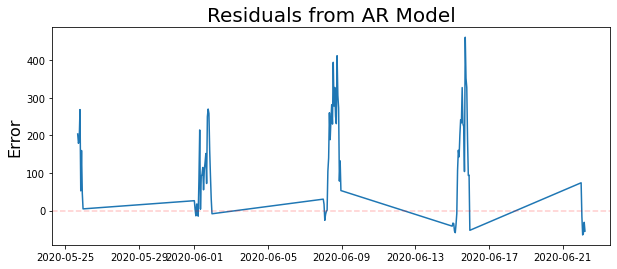

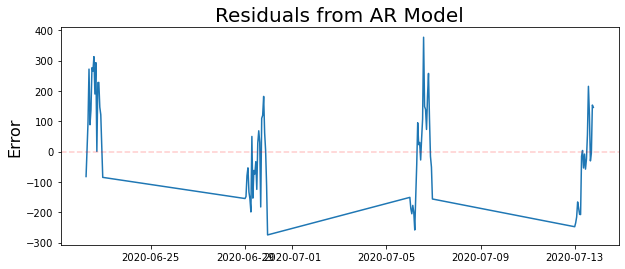

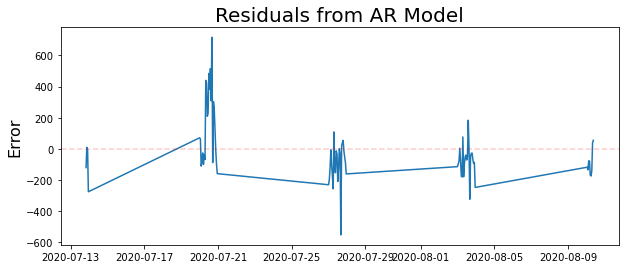

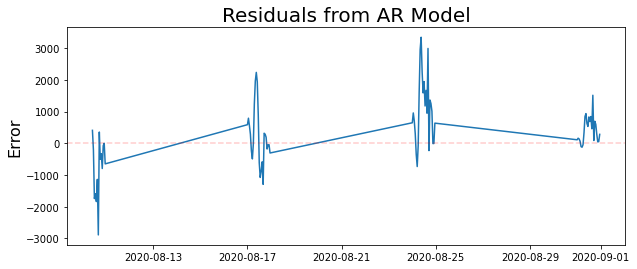

In [15]:
plt.figure(figsize=(10,4))
plt.plot(residuals_1)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)
    
plt.figure(figsize=(10,4))
plt.plot(residuals_2)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)
    
plt.figure(figsize=(10,4))
plt.plot(residuals_3)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)
    
plt.figure(figsize=(10,4))
plt.plot(residuals_4)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

# Gráficamos Datos Reales vs Predicción

Text(0, 0.5, 'Production')

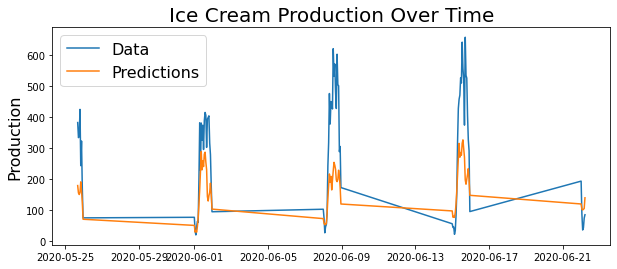

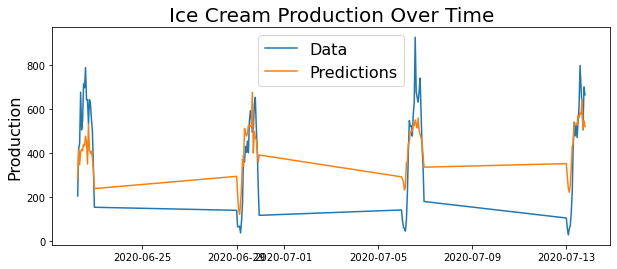

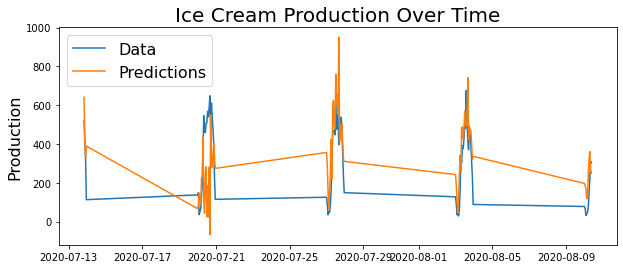

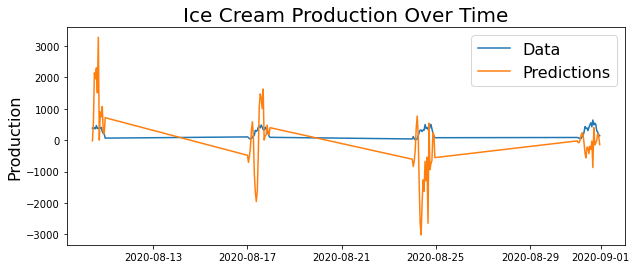

In [16]:
plt.figure(figsize=(10,4))
plt.plot(true_values_1)
plt.plot(predictions_1)
plt.legend(('Data','Predictions'),fontsize=16)
plt.title('Ice Cream Production Over Time', fontsize=20)
plt.ylabel('Production',fontsize=16)

plt.figure(figsize=(10,4))
plt.plot(true_values_2)
plt.plot(predictions_2)
plt.legend(('Data','Predictions'),fontsize=16)
plt.title('Ice Cream Production Over Time', fontsize=20)
plt.ylabel('Production',fontsize=16)

plt.figure(figsize=(10,4))
plt.plot(true_values_3)
plt.plot(predictions_3)
plt.legend(('Data','Predictions'),fontsize=16)
plt.title('Ice Cream Production Over Time', fontsize=20)
plt.ylabel('Production',fontsize=16)

plt.figure(figsize=(10,4))
plt.plot(true_values_4)
plt.plot(predictions_4)
plt.legend(('Data','Predictions'),fontsize=16)
plt.title('Ice Cream Production Over Time', fontsize=20)
plt.ylabel('Production',fontsize=16)

# Implementación de Modelo Prophet

## Separamos el conjunto de datos de entrenamiento y prueba

In [17]:
Lunes = Lunes.set_index('ds')

In [18]:
train_end = datetime.datetime(2020,8,24,23,0,0)
test_end = datetime.datetime(2020,8,31,23,0,0)

train_data = Lunes[:train_end]
test_data = Lunes[train_end + timedelta(days=1):test_end]

In [19]:
train_data = train_data.reset_index()
#test_data = test_data.reset_index()
train_data

,ds,y,Lunes1AM,Lunes2AM,Lunes3AM,Lunes4AM,Lunes5AM,Lunes6AM,Lunes7AM,Lunes8AM,...,Lunes15PM,Lunes16PM,Lunes17PM,Lunes18PM,Lunes19PM,Lunes20PM,Lunes21PM,Lunes22PM,Lunes23PM,Lunes24AM
0,2020-05-04 00:00:00,44.768,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2020-05-04 01:00:00,24.145,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2020-05-04 02:00:00,16.513,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2020-05-04 03:00:00,24.017,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2020-05-04 04:00:00,22.930,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,2020-08-24 19:00:00,504.834,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
404,2020-08-24 20:00:00,360.959,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
405,2020-08-24 21:00:00,228.980,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
406,2020-08-24 22:00:00,138.855,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


## Aplicamos Rolling Forecasting para evaluación del modelo

In [20]:
def crossvalidation():        
    predictions_rolling = pd.DataFrame({})
    test = test_data.copy()
    test = test.reset_index()
    test = test.drop(columns=['y'])    
    
    for end_date in test_data.index:        
        train_data = Lunes[:end_date - timedelta(hours=1)]  #Entrenamos el modelo cada que avanza 1 hora
        train_data = train_data.reset_index()
        m = Prophet(weekly_seasonality=False,daily_seasonality=True)#,growth='flat')       
        m.add_seasonality(name='Lunes24AM_season', period=122, fourier_order=7, condition_name='Lunes24AM')
        m.add_seasonality(name='Lunes1AM_season', period=122, fourier_order=7, condition_name='Lunes1AM')
        m.add_seasonality(name='Lunes2AM_season', period=122, fourier_order=7, condition_name='Lunes2AM')
        m.add_seasonality(name='Lunes3AM_season', period=122, fourier_order=7, condition_name='Lunes3AM')
        m.add_seasonality(name='Lunes4AM_season', period=122, fourier_order=7, condition_name='Lunes4AM')
        m.add_seasonality(name='Lunes5AM_season', period=122, fourier_order=7, condition_name='Lunes5AM')
        m.add_seasonality(name='Lunes6AM_season', period=122, fourier_order=7, condition_name='Lunes6AM')
        m.add_seasonality(name='Lunes7AM_season', period=122, fourier_order=7, condition_name='Lunes7AM')
        m.add_seasonality(name='Lunes8AM_season', period=122, fourier_order=7, condition_name='Lunes8AM')
        m.add_seasonality(name='Lunes9AM_season', period=122, fourier_order=7, condition_name='Lunes9AM')
        m.add_seasonality(name='Lunes10AM_season', period=122, fourier_order=7, condition_name='Lunes10AM')
        m.add_seasonality(name='Lunes11AM_season', period=122, fourier_order=7, condition_name='Lunes11AM')
        m.add_seasonality(name='Lunes12PM_season', period=122, fourier_order=7, condition_name='Lunes12PM')
        m.add_seasonality(name='Lunes13PM_season', period=122, fourier_order=7, condition_name='Lunes13PM')
        m.add_seasonality(name='Lunes14PM_season', period=122, fourier_order=7, condition_name='Lunes14PM')        
        m.add_seasonality(name='Lunes15PM_season', period=122, fourier_order=7, condition_name='Lunes15PM')        
        m.add_seasonality(name='Lunes16PM_season', period=122, fourier_order=7, condition_name='Lunes16PM')
        m.add_seasonality(name='Lunes17PM_season', period=122, fourier_order=7, condition_name='Lunes17PM')
        m.add_seasonality(name='Lunes18PM_season', period=122, fourier_order=7, condition_name='Lunes18PM')
        m.add_seasonality(name='Lunes19PM_season', period=122, fourier_order=7, condition_name='Lunes19PM')
        m.add_seasonality(name='Lunes20PM_season', period=122, fourier_order=7, condition_name='Lunes20PM')
        m.add_seasonality(name='Lunes21PM_season', period=122, fourier_order=7, condition_name='Lunes21PM')
        m.add_seasonality(name='Lunes22PM_season', period=122, fourier_order=7, condition_name='Lunes22PM')
        m.add_seasonality(name='Lunes23PM_season', period=122, fourier_order=7, condition_name='Lunes23PM')

        m.fit(train_data);              
        
        future = test.loc[test.loc[:,'ds'] == end_date]        
        forecast = m.predict(future)        
        output=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
        yhat = output[['ds','yhat']]
        predictions_rolling = predictions_rolling.append(yhat)       
        
    predictions_rolling = predictions_rolling.set_index('ds')
    fig = m.plot_components(forecast)
        
    return predictions_rolling, fig

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -23.6145
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1241.8    0.00357804       230.056           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     139       1243.88   0.000266035       226.123   9.658e-07       0.001      206  LS failed, Hessian reset 
     199       1246.89   0.000937652       190.052      0.8556      0.8556      276   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     273       1248.38   0.000129937       116.129   9.036e-07       0.001      425  LS failed, Hessian reset 
     299       1248.96   0.000249455       87.3673      0.7387      0.7387      460   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     303       1249.03    0.00104836       124.529   1.031e-05       0.001      495  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7223/3793257150.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -23.3038
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1244.68    0.00979462       469.939      0.8231      0.8231      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1247.58     0.0034671       113.345      0.5766      0.5766      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     226       1248.28    0.00134212       300.863    1.34e-05       0.001      312  LS failed, Hessian reset 
     299       1249.01   1.83131e-05       79.3694       0.874       0.874      394   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     350       1249.05   9.35278e-08        79.292       1.849      0.1849      456   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7223/3793257150.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -23.5619
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1244.86   0.000473809       176.906           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     171       1247.62   0.000136335       107.791   1.468e-06       0.001      250  LS failed, Hessian reset 
     193        1247.7    0.00010288       117.456   1.159e-06       0.001      313  LS failed, Hessian reset 
     199        1247.7   1.70865e-05       73.3366      0.8524      0.8524      319   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1248.26   2.55645e-05       94.0922      0.2796      0.2796      434   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1248.55   1.26522e-05        87.833      0.4284      0.4284      548   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7223/3793257150.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -24.9096
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1246.12     0.0102433       184.483           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1249.11    8.6404e-05       94.8758      0.6141      0.6141      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     228       1249.15   4.86234e-05       89.5554   5.381e-07       0.001      317  LS failed, Hessian reset 
     299       1249.17   0.000185906       88.2879           1           1      409   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1251.36   3.93411e-05       89.6867      0.4892      0.4892      531   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1251.48   0.000401391    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7223/3793257150.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -24.0381
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1250.15     0.0044657       196.953      0.4561      0.4561      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     185       1252.48    0.00023078       123.402   2.394e-06       0.001      270  LS failed, Hessian reset 
     199       1252.53   2.03735e-06       65.3716     0.06799           1      289   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     257       1252.56    2.5561e-08       75.7713      0.4451           1      366   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7223/3793257150.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -25.2017
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1253.53    0.00121379       156.616           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        1256.1   3.59415e-05        84.763           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     213       1256.12   2.86974e-05       85.4104   3.394e-07       0.001      292  LS failed, Hessian reset 
     299       1256.14   1.83369e-06        89.988           1           1      393   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     304       1256.14   5.83222e-06       79.5611   6.728e-08       0.001      437  LS failed, Hessian reset 
     321       1256.14    7.5637e-08       68.7069           1           1      462   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7223/3793257150.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -21.9443
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1256.27    0.00178547        89.831           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1258.84    0.00016299       98.9849      0.7285      0.7285      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       1258.97   0.000133476       126.919   9.924e-07       0.001      301  LS failed, Hessian reset 
     299       1259.14   9.40253e-05       95.5023   1.152e-06       0.001      449  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        1259.2   0.000277159       85.0822           1           1      566   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     423       1

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7223/3793257150.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -20.5006
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1258.43    0.00254168        253.95      0.9383      0.9383      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     142       1259.97   0.000452358        222.32   5.459e-06       0.001      198  LS failed, Hessian reset 
     194       1260.48   0.000200658       171.202   9.926e-07       0.001      292  LS failed, Hessian reset 
     199       1260.96    0.00154708       128.665           1           1      298   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     274       1261.25   0.000143427        123.13    1.51e-06       0.001      431  LS failed, Hessian reset 
     299       1261.31   1.43332e-06       84.4957      0.5232      0.5232      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7223/3793257150.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -16.4251
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1262.14   0.000205548       70.3192      0.6797      0.6797      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     146       1263.23   0.000270084       199.312   7.698e-07       0.001      226  LS failed, Hessian reset 
     199       1264.34   8.32215e-05       73.7267           1           1      290   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299          1265    0.00199929       94.9539           1           1      407   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     333       1266.02   0.000298342       208.774   2.622e-06       0.001      481  LS failed, Hessian reset 
     399       1266.86   6.15962e-05       89.3993        0.44        0.44      556   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7223/3793257150.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -13.7577
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1261.52    0.00162952       221.947           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     192       1263.96   0.000104897       97.8773   1.359e-06       0.001      269  LS failed, Hessian reset 
     199       1263.97   0.000209239        76.392           1           1      277   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1264.64     0.0139095       154.988           1           1      400   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     304       1264.76   0.000145639       135.824   1.189e-06       0.001      446  LS failed, Hessian reset 
     399       1265.71   0.000238827        98.186      0.9385      0.9385      553   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7223/3793257150.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -14.1008
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1263.45    0.00177366       226.995      0.2143      0.2143      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1266.13    0.00216266       148.487           1           1      263   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1266.34   1.14335e-05       81.2874           1           1      384   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     373       1266.93   0.000339774       210.937   3.443e-06       0.001      506  LS failed, Hessian reset 
     399       1267.21    0.00253515       119.463           1           1      532   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1267.56   0.000411277    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7223/3793257150.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -13.9219
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1265.09     0.0042636       319.109           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1266.88    0.00101072       202.715      0.4735      0.4735      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1268.09   0.000172453       101.951           1           1      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     336       1268.56   0.000259825       187.166   2.314e-06       0.001      437  LS failed, Hessian reset 
     399       1269.17   2.36875e-05       76.2139      0.3317           1      513   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     470       1269.69   0.000128277    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7223/3793257150.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -15.1061
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1266.71    0.00490947       272.416           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1269.06   0.000442329       90.5477      0.6649      0.6649      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1269.78    0.00316441       100.887           1           1      367   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     316       1269.88    0.00032176       238.562   2.894e-06       0.001      431  LS failed, Hessian reset 
     399        1270.2    0.00732789       89.1902           1           1      528   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1271.09   0.000341672    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7223/3793257150.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -13.872
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1267.87    0.00150273       209.495       2.508      0.2508      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1270.89   0.000983103       90.2983       0.993      0.2701      256   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        1272.3    0.00564303       110.255           1           1      378   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1273.63   1.73522e-05       88.9015      0.4406           1      493   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     427        1273.7    0.00017842       106.586   2.189e-06       0.001      577  LS failed, Hessian reset 
     499       1273.77   3.63066e-05     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7223/3793257150.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -14.0009
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1268.56    0.00372374       272.065      0.7918      0.7918      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1271.63    0.00065499       81.9818      0.2401           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1272.44   0.000240352       119.952      0.3405           1      361   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        1274.9   0.000296336       100.273      0.7487      0.7487      486   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1275.11   9.13134e-05       97.3205           1           1      603   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7223/3793257150.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -14.8807
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1261.29     0.0042322       168.991           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1264.43   0.000341288       102.538      0.5908      0.5908      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     240       1265.31   0.000177765       145.908   1.057e-06       0.001      316  LS failed, Hessian reset 
     299       1267.23   0.000157982       87.5482      0.9236      0.9236      381   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     340       1267.54   0.000558816       279.224   5.336e-06       0.001      468  LS failed, Hessian reset 
     399       1267.74   0.000151296       94.6614      0.6688      0.6688      536   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7223/3793257150.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -13.7931
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1266.08    0.00206305        103.61           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1269.49    0.00292547       176.448           1           1      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1272.02   4.13106e-06       72.8443      0.6523      0.6523      375   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1272.31   0.000870294       106.884           1           1      495   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     407       1272.44   0.000240917       100.876   2.973e-06       0.001      554  LS failed, Hessian reset 
     499       1272.89   9.26634e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7223/3793257150.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -17.1495
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1249.68   0.000914767         117.5      0.5832      0.5832      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1252.33    0.00379214       166.284       0.347           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1256.36   6.29584e-05       101.341      0.7851      0.7851      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     343       1256.61   0.000310128       177.188   2.955e-06       0.001      435  LS failed, Hessian reset 
     399       1256.98   5.69975e-05       88.2874      0.5827      0.5827      505   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     440       1256.99   1.24019e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7223/3793257150.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -13.9978
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1251.97    0.00362418       108.762           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1254.09   0.000916336       128.005           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1258.25    0.00286005       133.502      0.8087      0.8087      361   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     338       1258.86    0.00223388       151.219   2.361e-05       0.001      450  LS failed, Hessian reset 
     399       1259.19   1.73173e-05       85.0214           1           1      523   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1259.22   4.00871e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7223/3793257150.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -14.6865
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1244.36     0.0070632        205.88           1           1      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1249.69    0.00209822       111.673           1           1      264   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1251.17    0.00171224       95.2009           1           1      389   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     335       1251.66   0.000924857       347.106   7.325e-06       0.001      470  LS failed, Hessian reset 
     399          1252   9.01065e-05       85.1315      0.5521      0.5521      549   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1252.05   5.99475e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7223/3793257150.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -14.1929
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1246.71    0.00444006       259.079           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1250.11    0.00320056       157.949      0.8416      0.8416      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     232       1250.98    0.00356105       589.367   3.778e-05       0.001      312  LS failed, Hessian reset 
     299       1252.54   0.000485039        101.21       0.605       0.605      385   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1253.61   0.000604153       87.6737      0.8926      0.8926      498   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     408       1253.68   0.000204568    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7223/3793257150.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -15.6589
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1243.37    0.00357678        217.22      0.3558           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1245.91    0.00434563       129.899      0.2467           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     216        1246.9   0.000279532       193.879   1.333e-06       0.001      304  LS failed, Hessian reset 
     299       1247.86   8.56469e-06       83.6901       1.956      0.4866      406   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     398       1247.88   4.65343e-08        94.538      0.1647      0.7828      522   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7223/3793257150.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -16.6962
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1245.41    0.00115341       117.299      0.2461      0.2461      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1247.72    0.00556744       192.537           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     236       1249.37    0.00024572       146.318   8.646e-07       0.001      329  LS failed, Hessian reset 
     299       1250.29   6.11217e-06       99.3468      0.8054      0.8054      401   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     324       1250.29   3.86229e-08        95.808      0.3625           1      436   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7223/3793257150.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

Initial log joint probability = -19.9006
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1246.71    0.00386213         125.1           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1249.96    0.00196921       159.851           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     205       1250.54   0.000213537       122.549   8.826e-07       0.001      289  LS failed, Hessian reset 
     284       1251.62   0.000174864       127.928   1.578e-06       0.001      436  LS failed, Hessian reset 
     299       1251.63   2.24229e-06       84.2021      0.2731      0.2731      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     340       1251.64   1.06623e-05       94.5854    1.02e-07       0.001      545  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7223/3793257150.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp

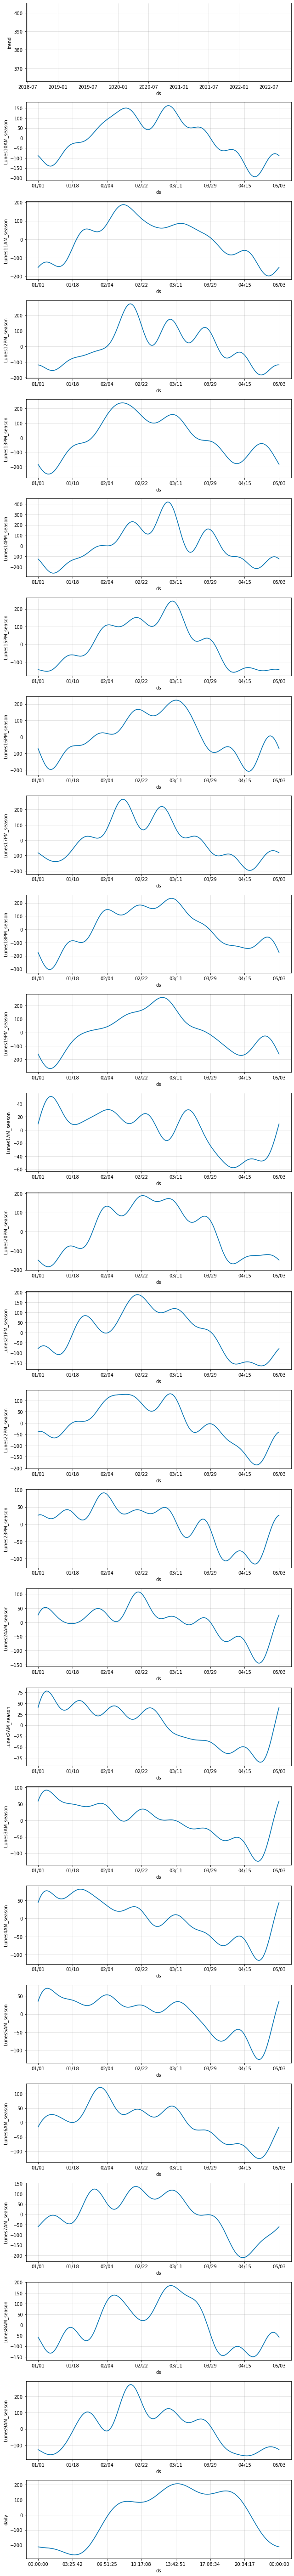

In [21]:
predictions_rolling, fig = crossvalidation()

In [22]:
residuals_rolling = test_data['y'] - predictions_rolling['yhat']
residuals_rolling = residuals_rolling.to_frame(name='residual_rolling')
residuals_rolling.head()

,residual_rolling
ds,
2020-08-31 00:00:00,-136.481501
2020-08-31 01:00:00,-134.206551
2020-08-31 02:00:00,-102.076050
2020-08-31 03:00:00,2.591763
2020-08-31 04:00:00,-19.276553


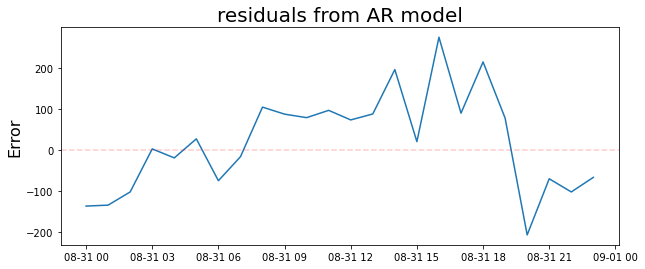

In [23]:
plt.figure(figsize=(10,4))
plt.plot(residuals_rolling)
plt.title('residuals from AR model', fontsize=20)
plt.ylabel('Error',fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Desplazamientos')

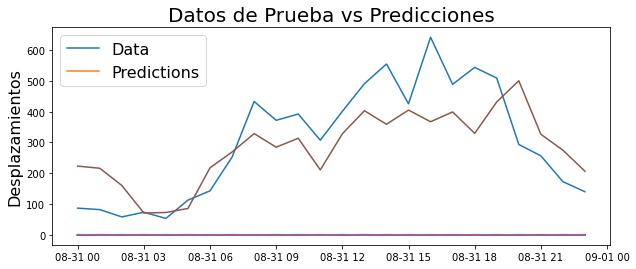

In [24]:
plt.figure(figsize=(10,4))
plt.plot(test_data)
plt.plot(predictions_rolling)

plt.legend(('Data','Predictions'),fontsize=16)

plt.title('Datos de Prueba vs Predicciones', fontsize=20)
plt.ylabel('Desplazamientos',fontsize=16)

In [25]:
pruebatrain = train_data.iloc[0:24]
pruebatrain2 = train_data.iloc[24:48]
pruebaprediction = predictions_rolling
pruebaprediction = pruebaprediction.reset_index()

# Comprobamos overfitting
## Comparamos el primer lunes y el segundo lunes de entrenamiento vs la predicción a ver si existe overfitting
## Al parecer no hay overfitting y el problema reside en el entrenamiento de 2 periodos diferentes (Desescalada y Nueva normalidad)

Text(0, 0.5, 'Desplazamientos')

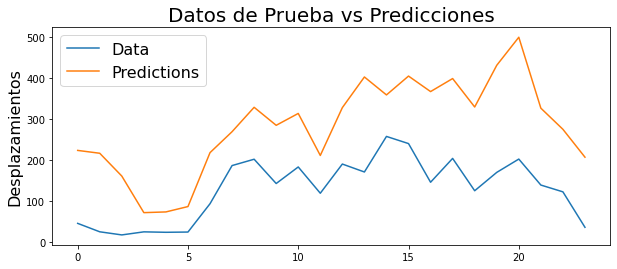

In [26]:
plt.figure(figsize=(10,4))
plt.plot(pruebatrain['y'])
plt.plot(pruebaprediction['yhat'])

plt.legend(('Data','Predictions'),fontsize=16)

plt.title('Datos de Prueba vs Predicciones', fontsize=20)
plt.ylabel('Desplazamientos',fontsize=16)

Text(0, 0.5, 'Desplazamientos')

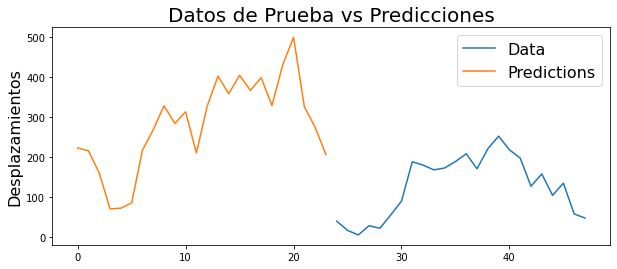

In [27]:
plt.figure(figsize=(10,4))
plt.plot(pruebatrain2['y'])
plt.plot(pruebaprediction['yhat'])

plt.legend(('Data','Predictions'),fontsize=16)

plt.title('Datos de Prueba vs Predicciones', fontsize=20)
plt.ylabel('Desplazamientos',fontsize=16)

# Cálculamos MAPE y RMSE
### RMSE se calculan de 2 formas distintas

## MAPE:

In [28]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals_rolling['residual_rolling']/test_data['y'])),4))

Mean Absolute Percent Error: 0.4635


## RMSE 1:

In [29]:
print('Root Mean Squared Error:',np.sqrt(np.mean(residuals_rolling**2)))

Root Mean Squared Error: residual_rolling    118.539405
dtype: float64


/home/jonathan/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


## RMSE 2: 

In [30]:
RMSE = sqrt(mean_squared_error(test_data.y, predictions_rolling.yhat))
RMSE

118.53940530718546

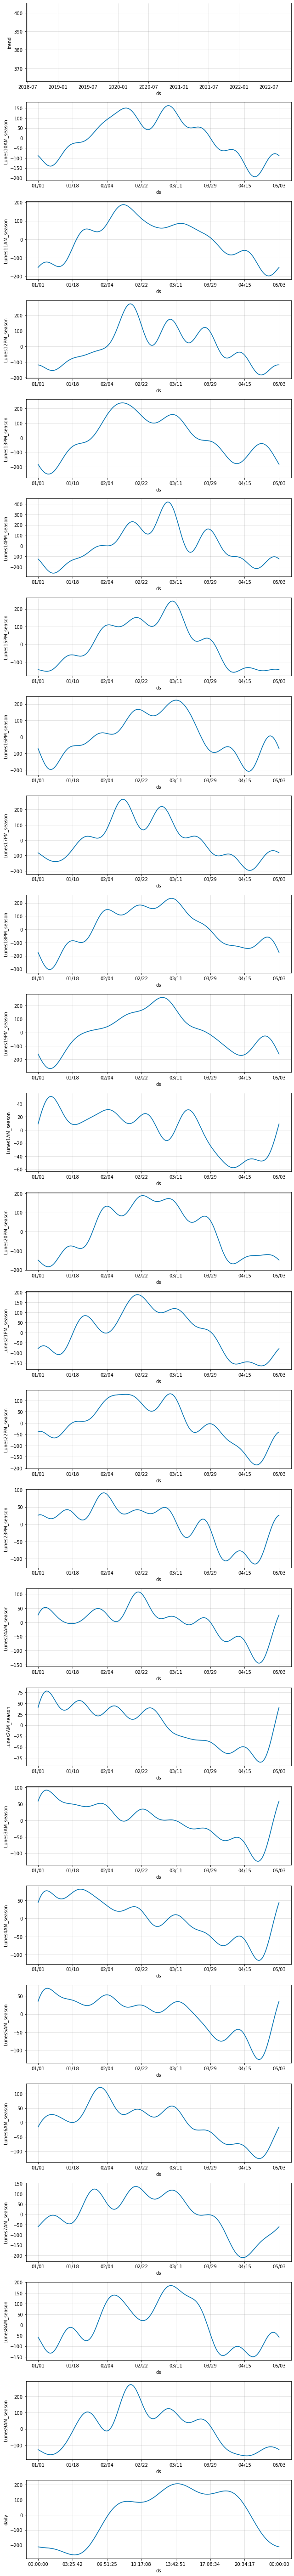

In [31]:
fig